# Juan Carlos Perez Ramirez
## Procesamiento de Lenguaje Natural
## Tarea 1

# 1. Corpus
Estenograficas (incluidas las de Claudia): https://drive.google.com/drive/folders/1ud-xeympOJ45qgIxgl5hWOtUI13hwNni?usp=sharing

# 2. Vistazo a los datos

In [1]:
import re
import glob
import nltk

In [46]:
def files_to_string(directory, pattern):
    '''
    Lee todos los archivos de un directorio que satisfacen el patron dado,
    los almacena en una lista de strings y los devuelve.
    '''
    contents = {}

    for file in glob.glob(directory + pattern):
        with open(file, 'r', encoding="utf-8") as f:
            contents[file[-14:-4]] = f.read()
    
    return contents
    

In [47]:
file_path = "./Practica1_Mananeras/estenograficas_limpias_por_fecha/"
data = files_to_string(file_path, "*")

In [37]:
corpus = ""
corpus = corpus.join(data.values())

In [38]:
split_text = corpus.split() # separa las palabras de cada texto
total_words = len(split_text) # longitud total del corpus (sin estar del todo limpias)
total_words

17027801

## Analisis del texto crudo

In [6]:
set_text = set(split_text) # tokeniza los textos
vocab_len = len(set_text) # longitud del vocabulario
vocab_len

267082

Para medir la riqueza del vocabulario, se calcula el porcentaje del corpus total que cada termino representa en promedio

In [7]:
def lexical_diversity(corpus, vocab):
    return len(corpus) / len(vocab)

In [8]:
vocab_complexity = lexical_diversity(split_text, set_text)
vocab_complexity

63.75495540695367

En promedio, cada termino se usa en promedio 64 veces a lo largo del corpus. Sin embargo, debe tomarse en cuenta que las estenograficas no estan del todo limpias (no contienen unicamente las participaciones de los hablantes) y la tokenizacion es sensible a mayusculas y cuenta tambien numeros y signos de puntuacion.

## Analisis del texto en minusculas

Cuando se convierte todo el texto a minusculas, se observa que la longitud del vocabulario se reduce, implicando que habian terminos que se contabilizaban por separado debido al uso de mayusculas

In [9]:
lower_corpus = corpus.lower() # convierte el corpus a minúsculas

In [10]:
split_lower_text = lower_corpus.split()
print(len(split_lower_text))
set_lower_text = set(split_lower_text)
vocab_lower_len = len(set_lower_text)
print(vocab_lower_len)

17027801
243973


In [11]:
vocab_complexity_lower = lexical_diversity(split_lower_text, set_lower_text)
vocab_complexity_lower

69.79379275575576

Como es de esperarse, el valor de la diversidad lexica aumenta, dado que ya no se cuentan por separado ocurrencias de terminos por el uso de mayusculas, de manera que refleja mas fielmente la riqueza del vocabulario 

## RegexpTokenizer

In [4]:
from nltk.tokenize import RegexpTokenizer, TweetTokenizer

In [5]:
regexp_tokens = RegexpTokenizer(r'[A-Za-zÁÉÍÓÚáéíóúÑñüÜ]+',flags=re.UNICODE).tokenize(corpus)
nltk_regexp_tokens = nltk.Text(regexp_tokens)

Al usar RegExp, que solo contabiliza palabras, se observa una reduccion en la longitud real del corpus ya que no esta contabilizando signos de puntuacion y numeros. Asimismo, la longitud del vocabulario tambien se ve reducida aproximadamente a la mitad de la encontrada previamente.

In [6]:
total_words_nltk = len(nltk_regexp_tokens)
print(total_words_nltk)
set_nltk = set(nltk_regexp_tokens)
vocab_len_nltk = len(set_nltk)
print(vocab_len_nltk)

16824125
107701


In [15]:
vocab_complexity_nltk = lexical_diversity(nltk_regexp_tokens, set_nltk)
print(vocab_complexity_nltk)

156.21140936481555


Finalmente, se observa que la diversidad lexica aumenta aun mas, dado que ya no se contabilizan tokens que no son palabras

## TweetTokenizer

In [21]:
tweet_tokens = TweetTokenizer().tokenize(lower_corpus)
nltk_tweet_tokens = nltk.Text(tweet_tokens)

In [ ]:
total_words_tweet = len(nltk_tweet_tokens)
print(total_words_nltk)
set_tweet_nltk = set(nltk_tweet_tokens)
vocab_len_tweet_nltk = len(set_nltk)
print(vocab_len_nltk)

16824125
107701


Al usar TweetTokenizer se obtienen los mismos resultados que con RegexpTokenizer, probablemente debido a que las estenograficas emplean lenguaje formal, de manera que no son usadas las consideraciones extra que usa TweetTokenizer (el uso del lenguaje informal usado en redes sociales)

# 3. Funciones NLTK
Analisis hecho con los datos de RegexpTokenizer

## Contexto

In [7]:
nltk_regexp_tokens.concordance("liberalismo")

Displaying 25 of 29 matches:
ervadores Y bueno por el lado del liberalismo que comunismo que socialismo que 
ue populismo pero es el tronco el liberalismo y por el lado del conservadurismo
smo le quisieron dar lecciones de liberalismo y el presidente López Obrador les
hermanos Flores Magón es decir un liberalismo social republicano abierto a much
arta está en uno de los tomos del Liberalismo en México de don Jesús Reyes Hero
 el dicho político de la época de liberalismo cuando se enfrentaba a Porfirio D
es principales es conservadurismo liberalismo eso es no hay otra cosa Entonces 
s muy rica en lo que significó el liberalismo mexicano del siglo XIX encabezado
 federalismo tiene que ver con el liberalismo así ha sucedido en la historia de
itorio no es crecer por crecer El liberalismo es dejar hacer dejar pasar el neo
tes principales en la historia el liberalismo y el conservadurismo y de ahí se 
o antirreleccionismo es Madero es liberalismo Neoliberalismo es conservadurismo
ralismo es 

In [8]:
nltk_regexp_tokens.concordance("opositores")

Displaying 25 of 781 matches:
da pero ahí se expresaron más los opositores a este plan Fui para allá y ya me
s y cuestionamientos legítimos de opositores no han pasado las cosas a mayores
 desafuero que yo me amparara mis opositores hasta pagaron la fianza dije No c
nstituciones y persiguiendo a los opositores de Morena Es cuanto presidente PR
se usaba para espiar sobre todo a opositores adversarios para eso se intervení
Y qué bueno que nos acicatean los opositores nos ayuda mucho eso para que nadi
hé por parte del PRI el PAN y los opositores es que durante los gobiernos del 
ros padecimos mucho cuando éramos opositores sobre todo la gente de que si se 
ema izquierda o radicales y otros opositores leales al régimen autoritario de 
dio X González y otros personajes opositores a nosotros y también a asociacion
ambién de personas de clase media opositores le decían a uno que estaban entre
neros cuando se trata de atacar a opositores en este caso a nuestro gobierno y
hicimos nosotros nada 

In [9]:
nltk_regexp_tokens.concordance("MORENA")

Displaying 25 of 1535 matches:
ema de prerrogativas Usted sabe que Morena ha sido el único partido que ya don
án teniendo un conflicto interno en Morena que está entrampando también su pro
lativo en la Cámara de Diputados de Morena y el PT que podrían impulsar presen
os alcaldes municipales emanados de Morena o de la Cuarta Transformación PRESI
do estas denuncias son regidores de Morena PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRA
presentó del Grupo Parlamentario de Morena para limitar las facultades de la S
 a los candidatos de la oposición a Morena Esto sucede básicamente con candida
 se adelanta de que por lo menos en Morena este de junio próximo perderá aprox
 y persiguiendo a los opositores de Morena Es cuanto presidente PRESIDENTE AND
gras Claudio Bres que es extracción Morena precisamente ha destinado al menos 
d es una candidata de su partido de Morena Cómo garantizar el fin de la impuni
 hizo también Guadiana candidato de Morena Entonces muy bien felicidades a la 
s hay cinco partidos 

In [30]:
nltk_regexp_tokens.concordance("covid")

Displaying 25 of 3571 matches:
ospitales para atender a enfermos de COVID Desde el principio de la pandemia le
aban porque la riqueza no es como el COVID no es contagiosa no permea se quedab
is económica que incluso el temor al COVID por ciento contra por ciento Hay com
ubre del con todo y la caída durante COVID septiembre del cuando se supera el n
as cosas no violencia mal manejo del COVID fosas clandestinas Este señor es uno
 de la salud que están en hospitales COVID Y aquí aclaro algo que considero imp
ico y del sector privado que atienen COVID Aunque no son muchas las camas que t
ospitales privados para para atender COVID son alrededor de de todas maneras lo
 maneras los que trabajan atendiendo COVID en hospitales privados van a tener g
a al personal que está en hospitales COVID Yo registré lo de la inconformidad l
no se está trabajando en un hospital COVID y que nada de vacunar a funcionarios
 el estado que guarda la epidemia de COVID cuando cumplimos ya ocho semanas de 
 el progr

In [31]:
nltk_regexp_tokens.concordance("vacaciones")

Displaying 25 of 259 matches:
iones pueden llegar hasta días de vacaciones Entonces cómo homologar eso para 
 el país que menos días otorga de vacaciones a sus trabajadores Preguntarle si
ntonces por eso lo de los días de vacaciones pues desde luego que están abajo 
os Acaba de pasar la temporada de vacaciones me refiero hace relativamente poc
 viven en Huatulco los que van de vacaciones nacionales extranjeros Ya las bah
rgar gasolina ahora que salgan de vacaciones si van a ir en automóvil revisen 
émicos a pesar de que están ya en vacaciones llamó mucho la atención el evento
l personal del Cisen Se fueron de vacaciones Y en enero yo informé a las autor
iempo ahora que van a estar estas vacaciones anticipadas a los niños que se le
ación Aguilar Camín que se fue de vacaciones un intelectual orgánico Pero tamb
vían en Teapa Y ya cuando iban de vacaciones no mandaban un telegrama avisando
salir de la escuela para estar de vacaciones allá en Teapa Y llegaba el telegr
ó en el periodo en que

## Palabras similares

In [36]:
nltk_regexp_tokens.similar("opositores")

que trabajadores y jóvenes mexicanos maestros años días niños
conservadores periodistas estados mil otros ciudadanos políticos
empresarios medios hospitales migrantes


Considerando que el presidente y Claudia tienden a referirse a sus opositores de manera negativa, las palabras que aparecen en contexto similar tenderan a aparecer tambien en una connotacion negativa. Esto se ve reflejado en como algunos de los terminos similares (periodistas, maestros, conservadores, empresarios, etc.) son grupos que en algun punto se manifestaron en contra del gobierno o sus acciones y viceversa.

## Grafica de dispersion

In [19]:
import os
from datetime import datetime
import matplotlib.pyplot as plt

In [65]:
data.keys()

dict_keys(['2024-10-17', '2024-01-05', '2020-01-20', '2020-08-27', '2019-07-26', '2023-08-02', '2022-09-15', '2024-05-07', '2019-11-22', '2024-11-20', '2020-01-10', '2019-05-02', '2020-06-28', '2023-06-05', '2020-12-28', '2021-09-21', '2022-04-19', '2019-06-01', '2022-05-09', '2022-07-04', '2023-08-21', '2022-01-21', '2022-09-30', '2023-02-06', '2023-11-29', '2021-06-25', '2021-05-13', '2023-05-23', '2020-10-02', '2022-01-19', '2021-08-16', '2020-03-19', '2024-10-22', '2020-10-07', '2019-02-06', '2021-10-01', '2021-06-08', '2020-01-17', '2019-08-29', '2022-11-11', '2024-05-20', '2023-03-03', '2024-07-26', '2024-02-21', '2022-05-18', '2019-01-31', '2021-08-18', '2022-05-11', '2022-02-11', '2024-09-20', '2023-01-12', '2024-01-12', '2019-10-24', '2024-04-16', '2020-05-19', '2022-11-29', '2021-02-08', '2022-02-17', '2019-01-29', '2023-04-05', '2020-11-05', '2023-01-04', '2019-07-16', '2024-03-26', '2019-01-24', '2021-12-04', '2019-12-11', '2024-12-27', '2019-12-23', '2019-02-11', '2019-03-

In [76]:
def is_valid_date(date_str):
	try:
		datetime.strptime(date_str, "%Y-%m-%d")
		return True
	except ValueError:
		return False

valid_files = [date for date in data.keys() if is_valid_date(date)]
sorted_dates = sorted(valid_files, key=lambda date: datetime.strptime(date, "%Y-%m-%d"))

In [77]:
tokenizer = RegexpTokenizer(r'[A-Za-zÁÉÍÓÚáéíóúÑñüÜ]+',flags=re.UNICODE)

tokens = []
for date in sorted_dates:
    data[date] = tokenizer.tokenize(data[date])
    tokens.extend(data[date])

txt = nltk.Text(tokens)

<Figure size 1500x600 with 0 Axes>

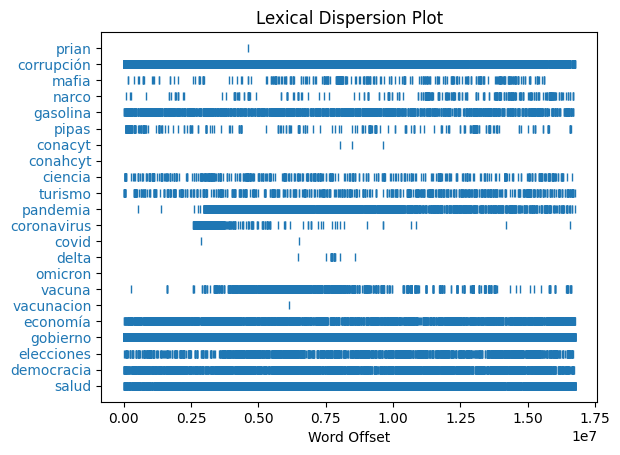

In [78]:
plt.figure(figsize=(15, 6))
txt.dispersion_plot(["prian", "corrupción", "mafia", "narco", "gasolina", "pipas",
    "conacyt", "conahcyt", "ciencia", "turismo", "pandemia",
    "coronavirus", "covid", "delta", "omicron", "vacuna", "vacunacion",
    "economía", "gobierno", "elecciones", "democracia", "salud"])

O usando la libreria nltk

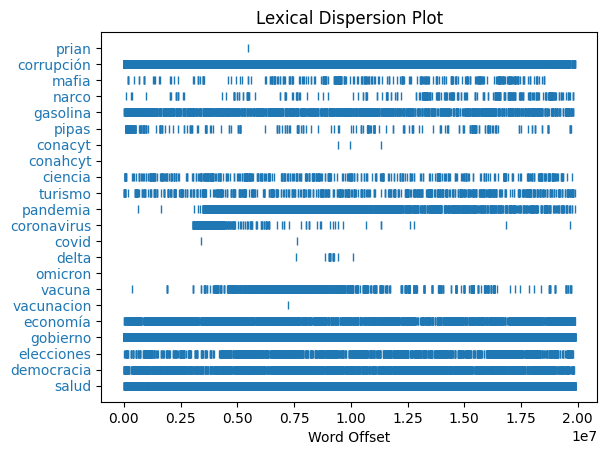

In [95]:
from nltk.corpus.reader import PlaintextCorpusReader
mananeras = PlaintextCorpusReader(file_path, '.*')
mananeras.fileids()

nltk.Text(mananeras.words()).dispersion_plot(["prian", "corrupción", "mafia", "narco", "gasolina", "pipas",
    "conacyt", "conahcyt", "ciencia", "turismo", "pandemia",
    "coronavirus", "covid", "delta", "omicron", "vacuna", "vacunacion",
    "economía", "gobierno", "elecciones", "democracia", "salud"])


## Colocaciones

In [8]:
from collections import Counter

In [27]:
nltk_regexp_tokens.collocations(50)

ANDRÉS MANUEL; PRESIDENTE ANDRÉS; LÓPEZ OBRADOR; MANUEL LÓPEZ; Estados
Unidos; por ciento; López Obrador; Andrés Manuel; Manuel López; señor
presidente; todos los; Versión estenográfica; prensa matutina; Buenos
días; Guardia Nacional; Muchas gracias; nada más; mil millones; Poder
Judicial; SHEINBAUM PARDO; CLAUDIA SHEINBAUM; Tren Maya; presidente
Andrés; Baja California; buenos días; RAMÍREZ CUEVAS; JESÚS RAMÍREZ;
Quintana Roo; que que; muy importante; MÉXICO CLAUDIA; desde luego;
sobre todo; creo que; todas las; Cuarta Transformación; matutina del;
por ejemplo; nuestro país; Por eso; adultos mayores; Comisión Federal;
con centavos; derechos humanos; Fiscalía General; García Luna; ver
con; los mexicanos; por eso; del presidente


## Histograma

In [10]:
word_lengths = [len(word) for word in nltk_regexp_tokens]
counts = Counter(word_lengths)
top5 = counts.most_common(5)

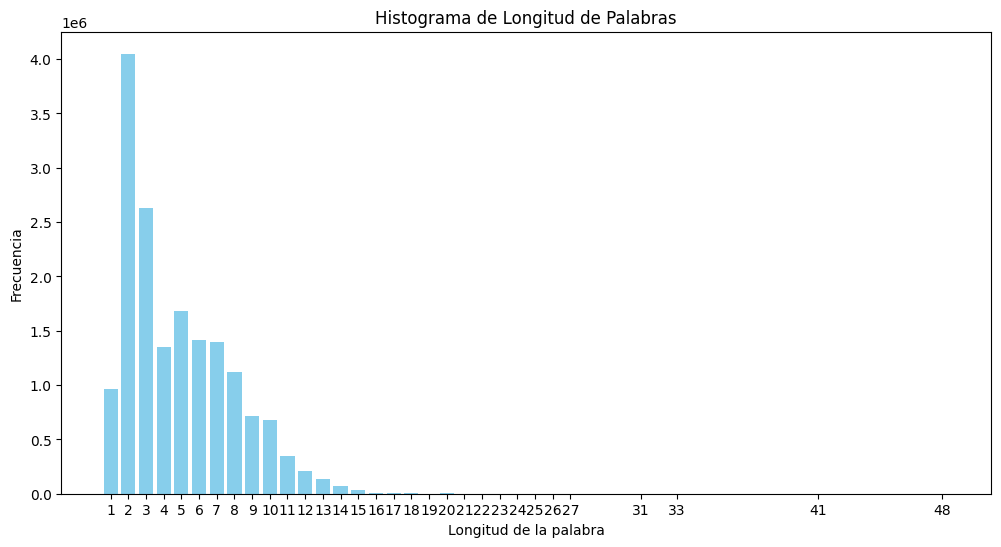

In [21]:
lengths, count = zip(*sorted(counts.items()))

# Crear el gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(lengths, count, color="skyblue")

for bar, length in zip(bars, lengths):
    if length in top5:
        bar.set_color("red")  # Cambia a rojo las barras del top 5

# Etiquetas
plt.xlabel("Longitud de la palabra")
plt.ylabel("Frecuencia")
plt.title("Histograma de Longitud de Palabras")
plt.xticks(lengths)  # Asegurar que se muestran todas las longitudes en X
plt.show()

## 50 palabras largas

In [22]:
def sortFreqDict(freqdict):
    aux = [(freqdict[key], key) for key in freqdict]
    aux.sort()
    aux.reverse()
    return aux

In [91]:
fdist = nltk.FreqDist(nltk_regexp_tokens)
# Lista de tuplas (frecuencia, palabra)
V = sortFreqDict(fdist)

words_50 = [word for freq, word in V if len(word) > 8 and freq > 5]
print(words_50[:50])

['presidente', 'PRESIDENTE', 'importante', 'información', 'INTERLOCUTOR', 'INTERLOCUTORA', 'Secretaría', 'corrupción', 'seguridad', 'conferencia', 'mexicanos', 'trabajadores', 'secretario', 'Presidente', 'trabajando', 'situación', 'presupuesto', 'elementos', 'estenográfica', 'investigación', 'Bienestar', 'República', 'INTERVENCIÓN', 'violencia', 'construcción', 'población', 'inversión', 'gobernador', 'desarrollo', 'municipios', 'hospitales', 'comunicación', 'Seguridad', 'autoridades', 'precisamente', 'democracia', 'aeropuerto', 'solamente', 'gobiernos', 'Constitución', 'preguntarle', 'participación', 'siguiente', 'administración', 'compromiso', 'SHEINBAUM', 'California', 'PRESIDENTA', 'educación', 'secretaria']


## ConditionalFreqDist

In [75]:
from nltk.probability import ConditionalFreqDist

<Axes: title={'center': 'Frecuencia de palabras objetivo en el tiempo'}, xlabel='Samples', ylabel='Counts'>

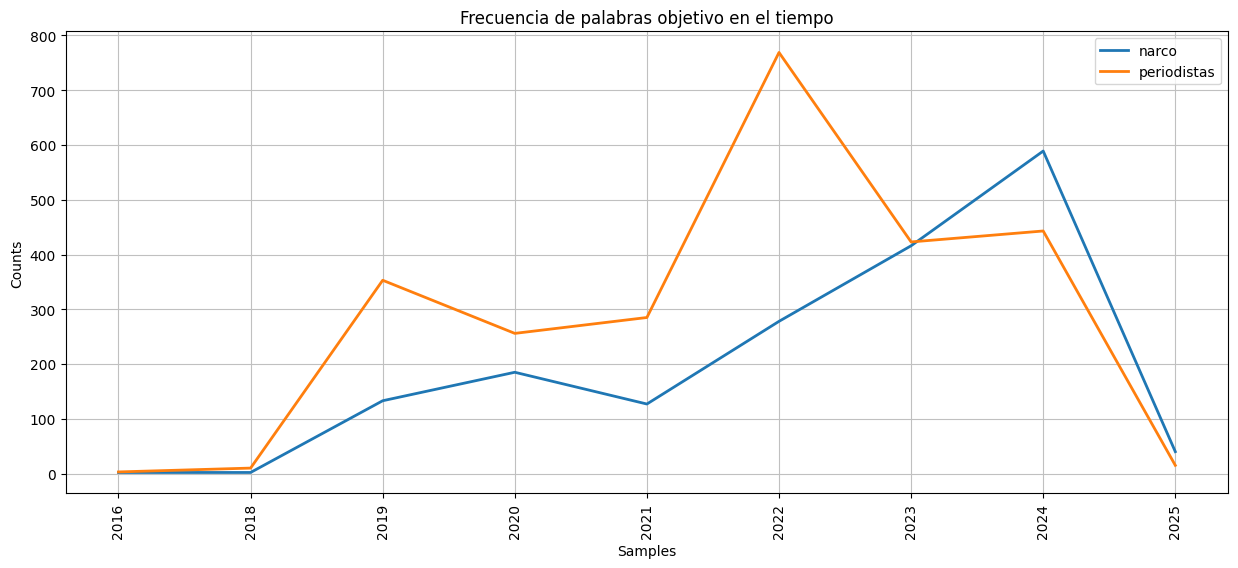

In [81]:
target_words = ["periodistas", "narco"]

cfd = ConditionalFreqDist(
    (target, date[:4])
    for date in sorted_dates
    for word in data[date]
    for target in target_words
    if word.lower().startswith(target)
)

plt.figure(figsize=(15, 6))
cfd.plot(title="Frecuencia de palabras objetivo en el tiempo")

## Stop words

In [82]:
from nltk.corpus import stopwords

In [83]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/juancho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
stop_words = set(stopwords.words('spanish'))
print(len(stop_words))
no_stopwords = [word for word in nltk_regexp_tokens if word.lower() not in stop_words]

print(total_words_nltk)
print(len(no_stopwords))

313
16824125
8157702


Si bien hay unicamente 313 stopwords (tan solo un 0.3% del vocabulario total), la longitud del corpus se reduce aproximadamente a la mitad, indicando la enorme frecuencia de uso de terminos que casi no aportan informacion al texto.

## 300 palabras mas frecuentes (sin stopwords)

In [89]:
[word[1] for word in V if word[1] not in stop_words][:300]

['Y',
 'presidente',
 'LÓPEZ',
 'MANUEL',
 'ANDRÉS',
 'OBRADOR',
 'PRESIDENTE',
 'si',
 'va',
 'mil',
 'México',
 'vamos',
 'Entonces',
 'En',
 'No',
 'gobierno',
 'ver',
 'aquí',
 'El',
 'dos',
 'caso',
 'millones',
 'ahí',
 'país',
 'La',
 'pues',
 'pueblo',
 'ahora',
 'Pero',
 'pesos',
 'días',
 'ser',
 'hacer',
 'van',
 'gente',
 'ciento',
 'así',
 'Es',
 'cómo',
 'usted',
 'tema',
 'señor',
 'parte',
 'años',
 'bien',
 'Sí',
 'importante',
 'tres',
 'decir',
 'Por',
 'todas',
 'puede',
 'año',
 'manera',
 'tener',
 'PREGUNTA',
 'Estados',
 'Unidos',
 'día',
 'mismo',
 'personas',
 'tiempo',
 'Nacional',
 'hace',
 'información',
 'INTERLOCUTOR',
 'prensa',
 'INTERLOCUTORA',
 'Se',
 'hoy',
 'entonces',
 'A',
 'bueno',
 'Bueno',
 'López',
 'Ya',
 'luego',
 'Secretaría',
 'voy',
 'DE',
 'acuerdo',
 'haciendo',
 'corrupción',
 'salud',
 'poder',
 'sólo',
 'seguridad',
 'ejemplo',
 'además',
 'trabajo',
 'Obrador',
 'Yo',
 'toda',
 'Manuel',
 'Si',
 'siempre',
 'ustedes',
 'Qué',
 'gene

# Otras librerias en Python

Ademas de NLTK, hay otras opciones de librerias para realizar tareas de NLP, todas con diferentes enfoques:
- spaCy. Realiza un analisis muy rapido, con manejo integrado de Name Entity Recognition y etiquetado Part-of-Speech, sin embargo no es facil entrenar modelos desde cero con ella y es menos flexible para preprocesamiento personalizado.
- TextBlob. Es muy simple de usar, sin embargo posee un soporte limitado para tareas avanzadas de NLP

Fuera de Python, hay otros lenguajes que permiten el procesamiento de texto para NLP:
- Java. Uno de los lenguajes principales para esto, posee algunas librerias (Apache OpenNLP y Stanford NLP) que permiten una personalizacion facil a los modelos y con un alto rendimiento; sin embargo requiere de una configuracion compleja y produce modelos mas lentos.
- C++. Posee la libreria MITIE, usado para aplicaciones de alto rendimiento, con mayor orientacion a modelos de NER, algoritmos de clasificacion de texto y con modelos preentrenados; sin embargo, tambien requiere de una configuracion complicada y no posee herramientas tan extensas como otras librerias.
- R. Posee algunas librerias (tm y text) especializadas en el prepocesamiento de texto y con gran presencia en la investigacion; sin embargo posee capacidades limitadas en el analisis y modelos preentrenados limitados, siendo ademas menos eficiente que otras librerias.